In [99]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2_contingency


In [145]:
# Import the datset into python
df = pd.read_excel(r"C:\Users\ia\Desktop\Travail\Bello Shakiru\3\Developing a Targeted Marketing Strategy for Continental Hotel.xlsx")

In [146]:
# View the first five variables
df.head()

,Timestamp,Age,Gender,Income,Location,Stay,Factors,Book,Room,Amenities,Practices,Hear,Recommend,Receive
0,2024-07-29 18:19:58.261,25- 34 years,Female,"£25,000 - £49,999",United Kingdom,2-3 times,"Price, Amenities, Customer reviews, Brand repu...","Hotel website, Online travel agency, Direct ca...",Deluxe room,"Free Wi-Fi, Complimentary breakfast, On-site r...",Very important,Not too far from where I live,Unlikely,Email
1,2024-07-31 16:52:13.334,25- 34 years,Female,"Less than £25,000",United Kingdom,2-3 times,Amenities,Hotel website,Suite,"Free Wi-Fi, Spa services, On-site restaurant",Very important,Online search,Unlikely,"Email, SMS"
2,2024-07-31 20:40:34.369,25- 34 years,Male,"Less than £25,000",United Kingdom,4-6 times,Price,"Online travel agency, Travel agent",Standard room,"Free Wi-Fi, Complimentary breakfast, Fitness c...",Neutral,Travel agency,Likely,SMS
3,2024-08-01 07:19:10.528,25- 34 years,Female,"Less than £25,000",United Kingdom,2-3 times,"Price, Amenities, Customer reviews, Special of...","Hotel website, Online travel agency",Standard room,Free Wi-Fi,Neutral,Never,Neutral,SMS
4,2024-08-01 07:28:14.743,35- 44 years,Male,"£25,000 - £49,999",United Kingdom,4-6 times,"Price, Amenities, Customer reviews",Online travel agency,Standard room,"Free Wi-Fi, Complimentary breakfast, Swimming ...",Very important,Online search,Likely,Email


In [9]:
# To show the total number of rows and columns
df.shape

(72, 14)

In [10]:
# To show the number of each coloumn
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Income', 'Location', 'Stay', 'Factors',
       'Book', 'Room', 'Amenities', 'Practices', 'Hear', 'Recommend',
       'Receive'],
      dtype='object')

In [152]:
# This attribute shows the data types of each column
df.dtypes

Timestamp    datetime64[ns]
Age                  object
Gender               object
Income               object
Location             object
Stay                 object
Factors              object
Book                 object
Room                 object
Amenities            object
Practices            object
Hear                float64
Recommend            object
Receive              object
dtype: object

In [153]:
# It will show the total no of unque value from whole data frame
df.nunique()

Timestamp    72
Age           5
Gender        2
Income        5
Location      4
Stay          4
Factors      19
Book         13
Room          3
Amenities    35
Practices     3
Hear          4
Recommend     5
Receive      15
dtype: int64

In [13]:
# It show the Count, mean , median etc
df.describe()

,Timestamp,Recommend
count,72,72.000000
mean,2024-08-07 06:31:01.096041472,2.888889
min,2024-07-29 18:19:58.261000,1.000000
25%,2024-08-02 04:02:19.180499968,2.000000
50%,2024-08-08 01:52:17.852499968,3.000000
75%,2024-08-09 18:59:15.857250048,4.000000
max,2024-08-16 08:45:51.407000,5.000000
std,NaN,1.295230


In [14]:
# It shows the how many null values
df.isnull()

,Timestamp,Age,Gender,Income,Location,Stay,Factors,Book,Room,Amenities,Practices,Hear,Recommend,Receive
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,False,False,False,False,False,False,False,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# To Show Data type of each colum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  72 non-null     datetime64[ns]
 1   Age        72 non-null     object        
 2   Gender     72 non-null     object        
 3   Income     72 non-null     object        
 4   Location   72 non-null     object        
 5   Stay       72 non-null     object        
 6   Factors    72 non-null     object        
 7   Book       72 non-null     object        
 8   Room       72 non-null     object        
 9   Amenities  72 non-null     object        
 10  Practices  72 non-null     object        
 11  Hear       72 non-null     object        
 12  Recommend  72 non-null     int64         
 13  Receive    72 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 8.0+ KB


In [16]:
age_percentages = df["Age"].value_counts(normalize=True) * 100  
age_percentages

Age
25- 34 years     54.166667
35- 44 years     34.722222
45 - 54 years     5.555556
18 -24 years      4.166667
55 - 64 years     1.388889
Name: proportion, dtype: float64

In [76]:
Gender_percentages = df["Gender"].value_counts(normalize=True) * 100  
Gender_percentages

Gender
Male      56.944444
Female    43.055556
Name: proportion, dtype: float64

In [18]:
Income_percentages = df["Income"].value_counts(normalize=True) * 100  
Income_percentages

Income
Less than £25,000      51.388889
£25,000 - £49,999      37.500000
£50,000 - £74,999       8.333333
£100,000 - £149,999     1.388889
£75,000 - £99,999       1.388889
Name: proportion, dtype: float64

In [19]:
print(pd.concat([df["Age"].value_counts(), df["Age"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

               Count  Percentage
Age                             
25- 34 years      39    0.541667
35- 44 years      25    0.347222
45 - 54 years      4    0.055556
18 -24 years       3    0.041667
55 - 64 years      1    0.013889


In [20]:
# Convert Age to numeric using mapping
Age_map = {'18 -24 years': 1, '25- 34 years': 2, "35-  years": 3, "45 - 54 years": 4, "55 - 64 years": 5}
df['Age'] = df['Age'].map(Age_map)

# Descriptive statistics
print(df['Age'].describe())

count    47.000000
mean      2.170213
std       0.760982
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: Age, dtype: float64


In [21]:
print(pd.concat([df["Gender"].value_counts(), df["Gender"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

        Count  Percentage
Gender                   
Male       41    0.569444
Female     31    0.430556


In [77]:
# Convert Age to numeric using mapping
Gender_map = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(Gender_map)

# Descriptive statistics
print(df['Gender'].describe())

count    72.000000
mean      0.430556
std       0.498629
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Gender, dtype: float64


In [23]:
print(pd.concat([df["Income"].value_counts(), df["Income"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                     Count  Percentage
Income                                
Less than £25,000       37    0.513889
£25,000 - £49,999       27    0.375000
£50,000 - £74,999        6    0.083333
£100,000 - £149,999      1    0.013889
£75,000 - £99,999        1    0.013889


In [78]:
# Convert Income to numeric using mapping
Income_map = {'Less than £25,000': 1, '£25,000 - £49,999': 2, "£50,000 - £74,999": 3, "£100,000 - £149,999": 4, "£75,000 - £99,999": 5}
df['Income'] = df['Income'].map(Income_map)

# Descriptive statistics
print(df['Income'].describe())

count    72.000000
mean      1.638889
std       0.810243
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: Income, dtype: float64


In [30]:
print(pd.concat([df["Location"].value_counts(), df["Location"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                 Count  Percentage
Location                          
United Kingdom      63    0.875000
Nigeria              7    0.097222
Iran                 1    0.013889
United Kingdom       1    0.013889


In [31]:
# Convert Location to numeric using mapping
Location_map = {'United Kingdom': 1, 'Nigeria': 2, "Iran": 3}
df['Location'] = df['Location'].map(Location_map)

# Descriptive statistics
print(df['Location'].describe())

count    2.000000
mean     2.000000
std      1.414214
min      1.000000
25%      1.500000
50%      2.000000
75%      2.500000
max      3.000000
Name: Location, dtype: float64


In [84]:
from mpl_toolkits.mplot3d import Axes3D  

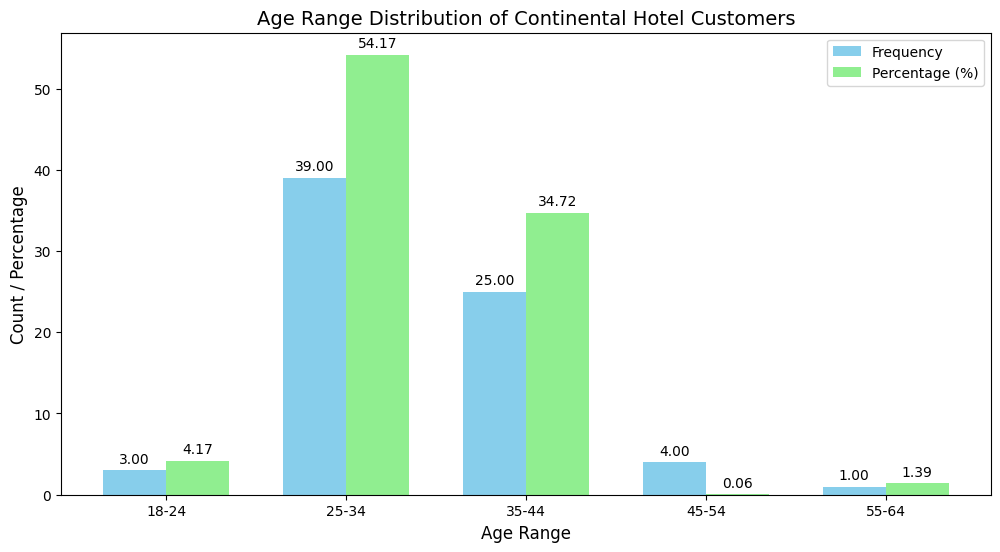

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
age_ranges = ['18-24', '25-34', '35-44', '45-54', '55-64']
frequencies = [3, 39, 25, 4, 1]
percentages = [4.17, 54.17, 34.72, 0.06, 1.39]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar graph
x = np.arange(len(age_ranges))
width = 0.35

rects1 = ax.bar(x - width/2, frequencies, width, label='Frequency', color='skyblue')
rects2 = ax.bar(x + width/2, percentages, width, label='Percentage (%)', color='lightgreen')

# Customize the graph
ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Count / Percentage', fontsize=12)
ax.set_title('Age Range Distribution of Continental Hotel Customers', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(age_ranges)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

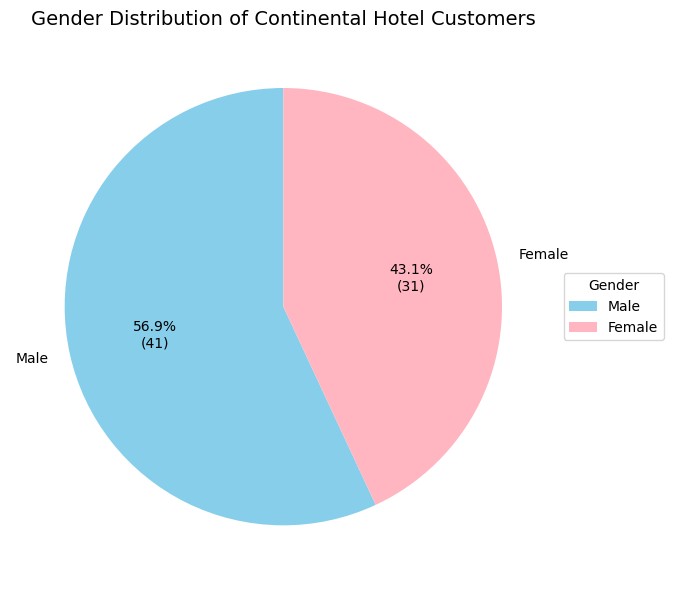

In [122]:
# Data from the table
genders = ['Male', 'Female']
frequencies = [41, 31]
percentages = [56.94, 43.06]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the pie chart
wedges, texts, autotexts = ax.pie(percentages, labels=genders, autopct='%1.1f%%',
                                  startangle=90, colors=['skyblue', 'lightpink'])

# Add frequency information to the labels
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{percentages[i]:.1f}%\n({frequencies[i]})')

# Customize the chart
ax.set_title('Gender Distribution of Continental Hotel Customers', fontsize=14)

# Add a legend
ax.legend(wedges, genders,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and display the graph
plt.tight_layout()
plt.show()


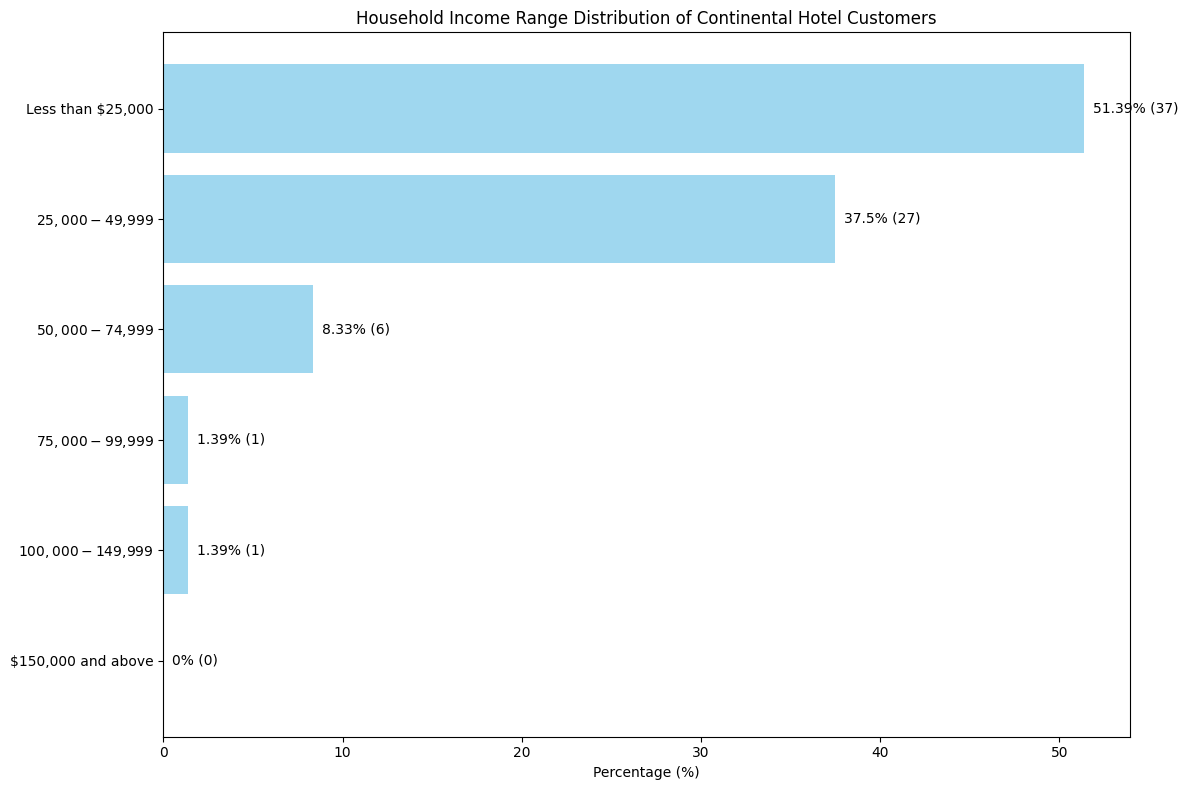

In [123]:
# Data from the table
income_ranges = ['Less than $25,000', '$25,000-$49,999', '$50,000-$74,999', 
                 '$75,000-$99,999', '$100,000-$149,999', '$150,000 and above']
frequencies = [37, 27, 6, 1, 1, 0]
percentages = [51.39, 37.50, 8.33, 1.39, 1.39, 0]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar chart
y_pos = np.arange(len(income_ranges))
ax.barh(y_pos, percentages, align='center', color='skyblue', alpha=0.8)

# Customize the chart
ax.set_yticks(y_pos)
ax.set_yticklabels(income_ranges)
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Percentage (%)')
ax.set_title('Household Income Range Distribution of Continental Hotel Customers')

# Add value labels on the bars
for i, v in enumerate(percentages):
    ax.text(v + 0.5, i, f'{v}% ({frequencies[i]})', va='center')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

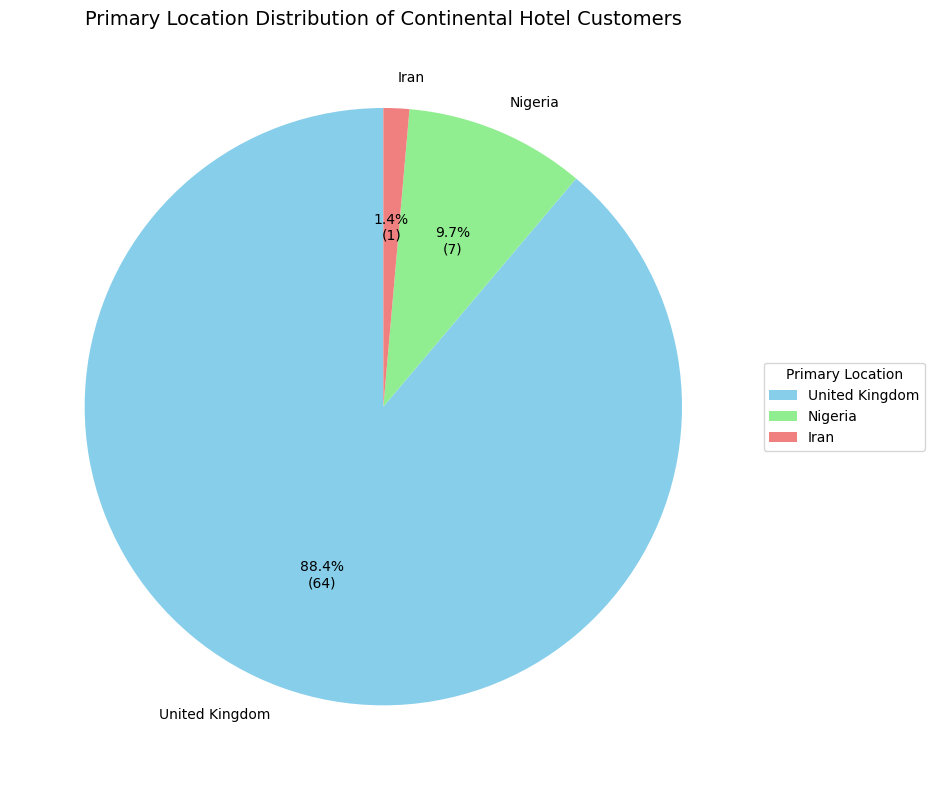

In [124]:
# Data from the table
locations = ['United Kingdom', 'Nigeria', 'Iran']
frequencies = [64, 7, 1]
percentages = [88.39, 9.72, 1.39]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the pie chart
wedges, texts, autotexts = ax.pie(percentages, labels=locations, autopct='%1.1f%%',
                                  startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])

# Add frequency information to the labels
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{percentages[i]:.1f}%\n({frequencies[i]})')

# Customize the chart
ax.set_title('Primary Location Distribution of Continental Hotel Customers', fontsize=14)

# Add a legend
ax.legend(wedges, locations,
          title="Primary Location",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

In [82]:
print(pd.concat([df["Stay"].value_counts(), df["Stay"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                   Count  Percentage
Stay                                
Once                  31    0.430556
2-3 times             25    0.347222
4-6 times              9    0.125000
More than 6 times      7    0.097222


In [83]:
# Convert Stay to numeric using mapping
Stay_map = {'Once': 1, '2-3 times': 2, "4-6 times": 3, "More than 6 times": 4}
df['Stay'] = df['Stay'].map(Stay_map)

# Descriptive statistics
print(df['Stay'].describe())

count    72.000000
mean      1.888889
std       0.972228
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: Stay, dtype: float64


In [129]:
pybool = df['Factors'].str.contains('Price')
pybool.value_counts()
pybool.value_counts(normalize=True)

Factors
True     0.722222
False    0.277778
Name: proportion, dtype: float64

In [130]:
Fact = df['Factors'].str.split(',', expand=True)
Fact.head()

,0,1,2,3,4
0,Price,Amenities,Customer reviews,Brand reputation,None
1,Amenities,None,None,None,None
2,Price,None,None,None,None
3,Price,Amenities,Customer reviews,Special offers or discounts,None
4,Price,Amenities,Customer reviews,None,None


In [131]:
Fact.stack().value_counts()


Price                           52
 Customer reviews               35
 Amenities                      29
 Special offers or discounts    25
 Brand reputation               20
Amenities                        9
Customer reviews                 5
Special offers or discounts      3
Brand reputation                 3
Name: count, dtype: int64

In [132]:
Fact.stack().value_counts(normalize=True)


Price                           0.287293
 Customer reviews               0.193370
 Amenities                      0.160221
 Special offers or discounts    0.138122
 Brand reputation               0.110497
Amenities                       0.049724
Customer reviews                0.027624
Special offers or discounts     0.016575
Brand reputation                0.016575
Name: proportion, dtype: float64

In [133]:
print(Fact.stack().value_counts().describe())


count     9.000000
mean     20.111111
std      16.877829
min       3.000000
25%       5.000000
50%      20.000000
75%      29.000000
max      52.000000
Name: count, dtype: float64


<Axes: >

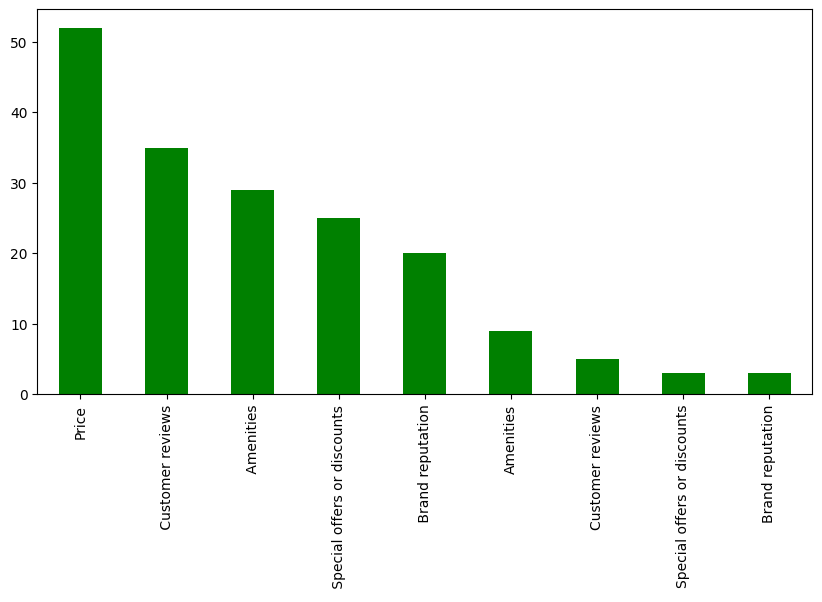

In [134]:
Fact.stack().value_counts().plot(kind='bar', figsize= (10, 5), color ='green')

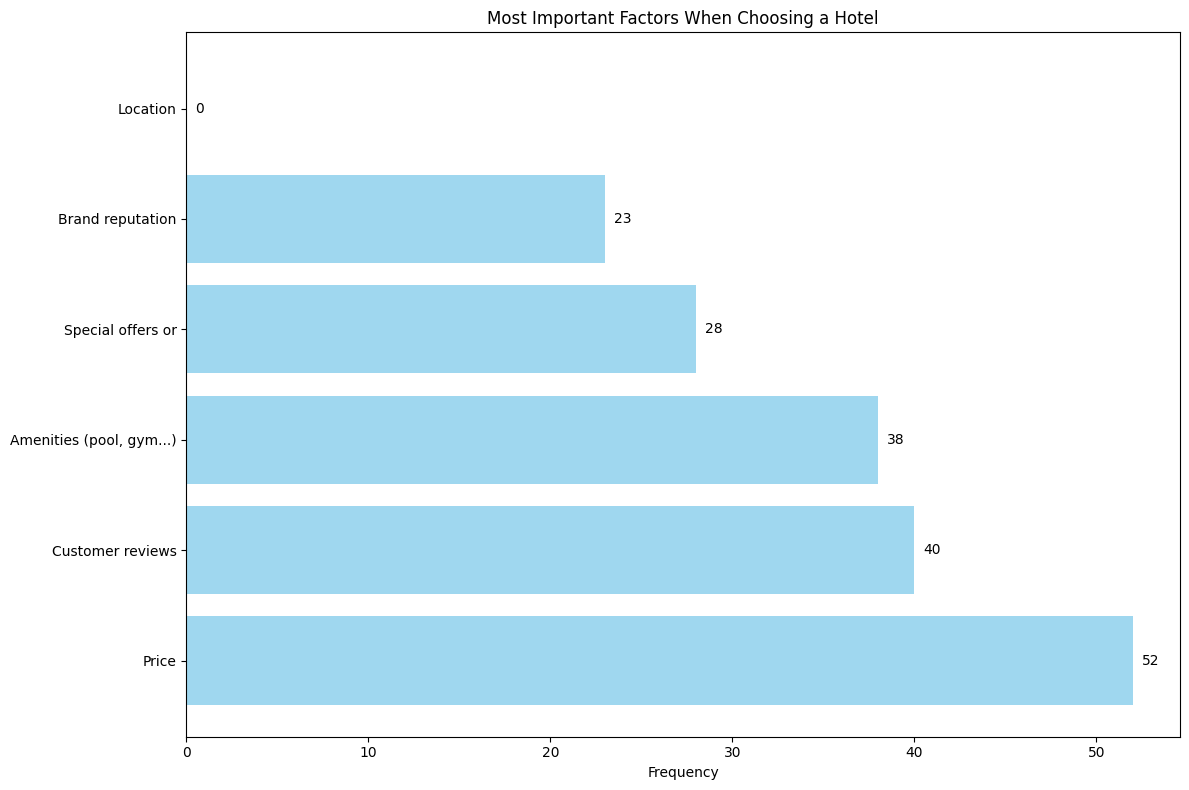

In [135]:
# Data from the table
factors = ['Price', 'Location', 'Amenities (pool, gym...)', 'Customer reviews', 'Brand reputation', 'Special offers or']
frequencies = [52, 0, 38, 40, 23, 28]

# Sort the data in descending order
factors, frequencies = zip(*sorted(zip(factors, frequencies), key=lambda x: x[1], reverse=True))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar chart
ax.barh(factors, frequencies, color='skyblue', alpha=0.8)

# Customize the chart
ax.set_xlabel('Frequency')
ax.set_title('Most Important Factors When Choosing a Hotel')

# Add value labels on the bars
for i, v in enumerate(frequencies):
    ax.text(v + 0.5, i, str(v), va='center')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

In [138]:
pybool2 = df['Book'].str.contains('Hotel website')
pybool2.value_counts()
pybool2.value_counts(normalize=True)

Book
True     0.625
False    0.375
Name: proportion, dtype: float64

In [139]:
Books = df['Book'].str.split(',', expand=True)
Books.head()

,0,1,2
0,Hotel website,Online travel agency,Direct call to the hotel
1,Hotel website,None,None
2,Online travel agency,Travel agent,None
3,Hotel website,Online travel agency,None
4,Online travel agency,None,None


In [140]:
Books.stack().value_counts()

Hotel website                45
Online travel agency         16
 Online travel agency        14
 Direct call to the hotel    10
Direct call to the hotel      8
 Travel agent                 4
Travel agent                  2
 Walk in                      1
To flex                       1
Name: count, dtype: int64

In [141]:
Books.stack().value_counts().describe()

count     9.000000
mean     11.222222
std      13.827308
min       1.000000
25%       2.000000
50%       8.000000
75%      14.000000
max      45.000000
Name: count, dtype: float64

In [142]:
Books.stack().value_counts(normalize=True)

Hotel website                0.445545
Online travel agency         0.158416
 Online travel agency        0.138614
 Direct call to the hotel    0.099010
Direct call to the hotel     0.079208
 Travel agent                0.039604
Travel agent                 0.019802
 Walk in                     0.009901
To flex                      0.009901
Name: proportion, dtype: float64

<Axes: >

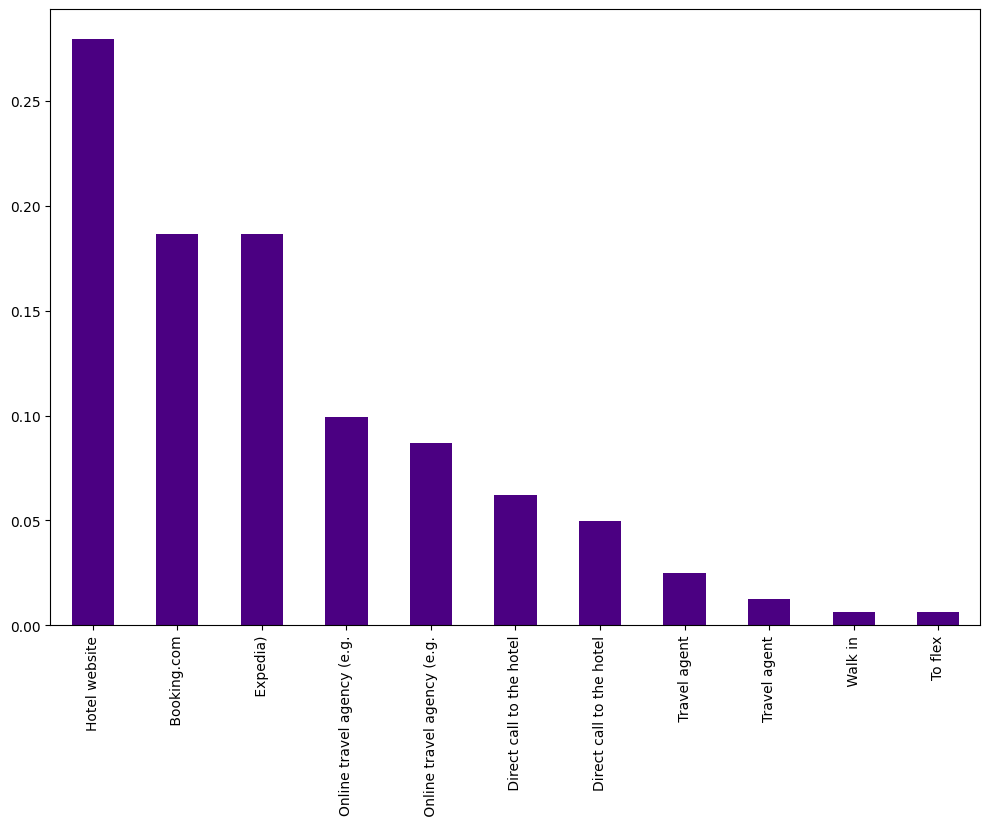

In [51]:
Books.stack().value_counts(normalize=True).plot(kind='bar', figsize= (12, 8), color ='indigo')

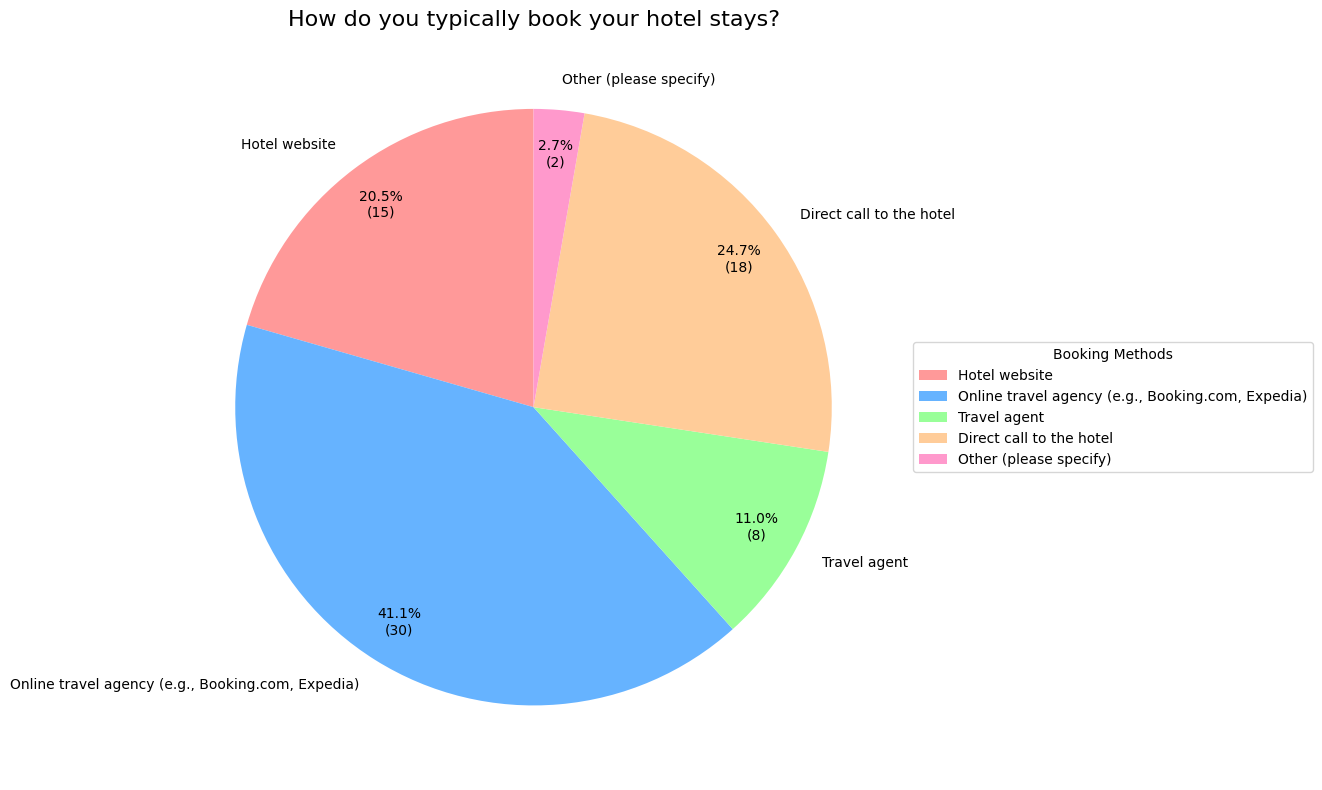

In [143]:
# Data from the table
booking_methods = ['Hotel website', 'Online travel agency (e.g., Booking.com, Expedia)', 
                   'Travel agent', 'Direct call to the hotel', 'Other (please specify)']
frequencies = [15, 30, 8, 18, 2]

# Calculate percentages
total = sum(frequencies)
percentages = [f'{(freq/total)*100:.1f}%' for freq in frequencies]

# Create color map
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the pie chart
wedges, texts, autotexts = ax.pie(frequencies, labels=booking_methods, autopct='%1.1f%%',
                                  startangle=90, colors=colors, pctdistance=0.85)

# Add frequency information to the labels
for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{percentages[i]}\n({frequencies[i]})')

# Customize the chart
ax.set_title('How do you typically book your hotel stays?', fontsize=16)

# Add a legend
ax.legend(wedges, booking_methods,
          title="Booking Methods",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

In [52]:
print(pd.concat([df["Room"].value_counts(), df["Room"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

               Count  Percentage
Room                            
Standard room     42    0.583333
Deluxe room       17    0.236111
Suite             13    0.180556


In [55]:
# Convert Room to numeric using mapping
Room_map = {'Standard room': 1, 'Deluxe room': 2, "Suite": 3}
df['Room'] = df['Room'].map(Room_map)

# Descriptive statistics
print(df['Room'].describe())

count    72.000000
mean      1.597222
std       0.781110
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Room, dtype: float64


In [57]:
pybool3 = df['Amenities'].str.contains('Free Wi-Fi')
pybool3.value_counts()
pybool3.value_counts(normalize=True)

Amenities
True     0.847222
False    0.152778
Name: proportion, dtype: float64

In [58]:
pybool3 = df['Amenities'].str.split(',', expand=True)
pybool3.head()

,0,1,2,3,4,5,6
0,Free Wi-Fi,Complimentary breakfast,On-site restaurant,None,None,None,None
1,Free Wi-Fi,Spa services,On-site restaurant,None,None,None,None
2,Free Wi-Fi,Complimentary breakfast,Fitness center,Spa services,None,None,None
3,Free Wi-Fi,None,None,None,None,None,None
4,Free Wi-Fi,Complimentary breakfast,Swimming pool,On-site restaurant,None,None,None


In [59]:
pybool3.stack().value_counts()

Free Wi-Fi                  61
 Complimentary breakfast    46
 On-site restaurant         34
 Fitness center             20
 Swimming pool              20
 Spa services               18
 Business center             7
On-site restaurant           4
Complimentary breakfast      4
Swimming pool                2
Fitness center               1
Name: count, dtype: int64

In [80]:
pybool3.stack().value_counts().describe()

count    11.000000
mean     19.727273
std      19.804499
min       1.000000
25%       4.000000
50%      18.000000
75%      27.000000
max      61.000000
Name: count, dtype: float64

In [60]:
pybool3.stack().value_counts(normalize=True)

Free Wi-Fi                  0.281106
 Complimentary breakfast    0.211982
 On-site restaurant         0.156682
 Fitness center             0.092166
 Swimming pool              0.092166
 Spa services               0.082949
 Business center            0.032258
On-site restaurant          0.018433
Complimentary breakfast     0.018433
Swimming pool               0.009217
Fitness center              0.004608
Name: proportion, dtype: float64

<Axes: >

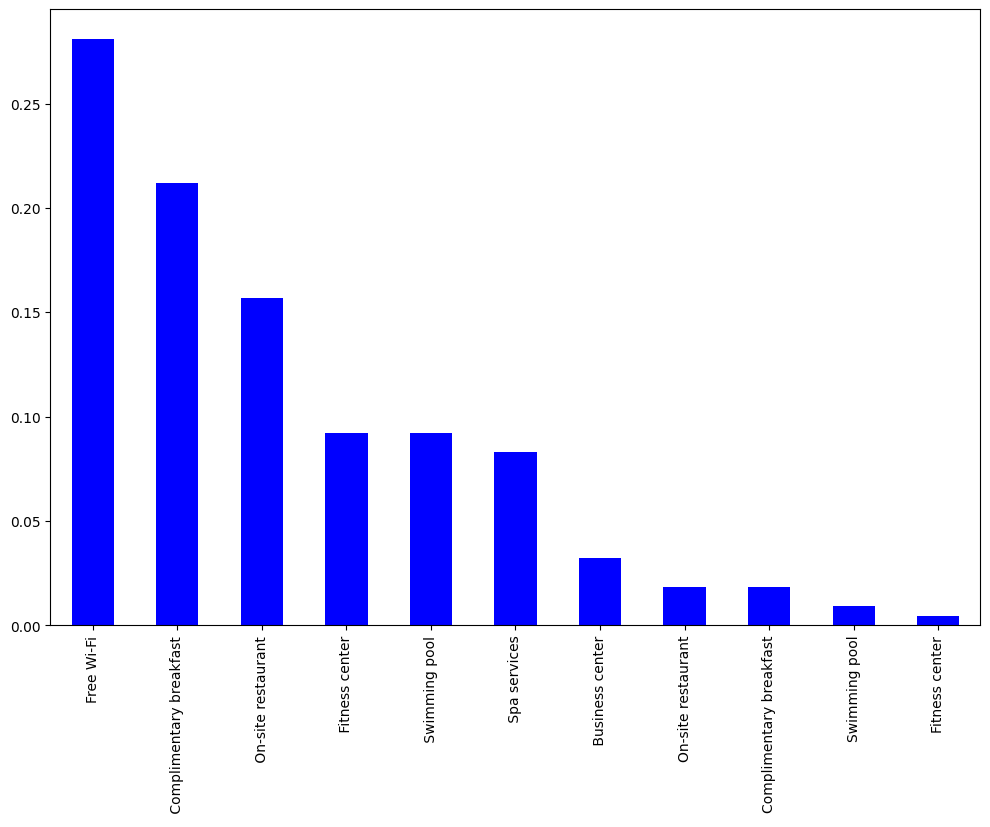

In [61]:
pybool3.stack().value_counts(normalize=True).plot(kind='bar', figsize= (12, 8), color ='blue')

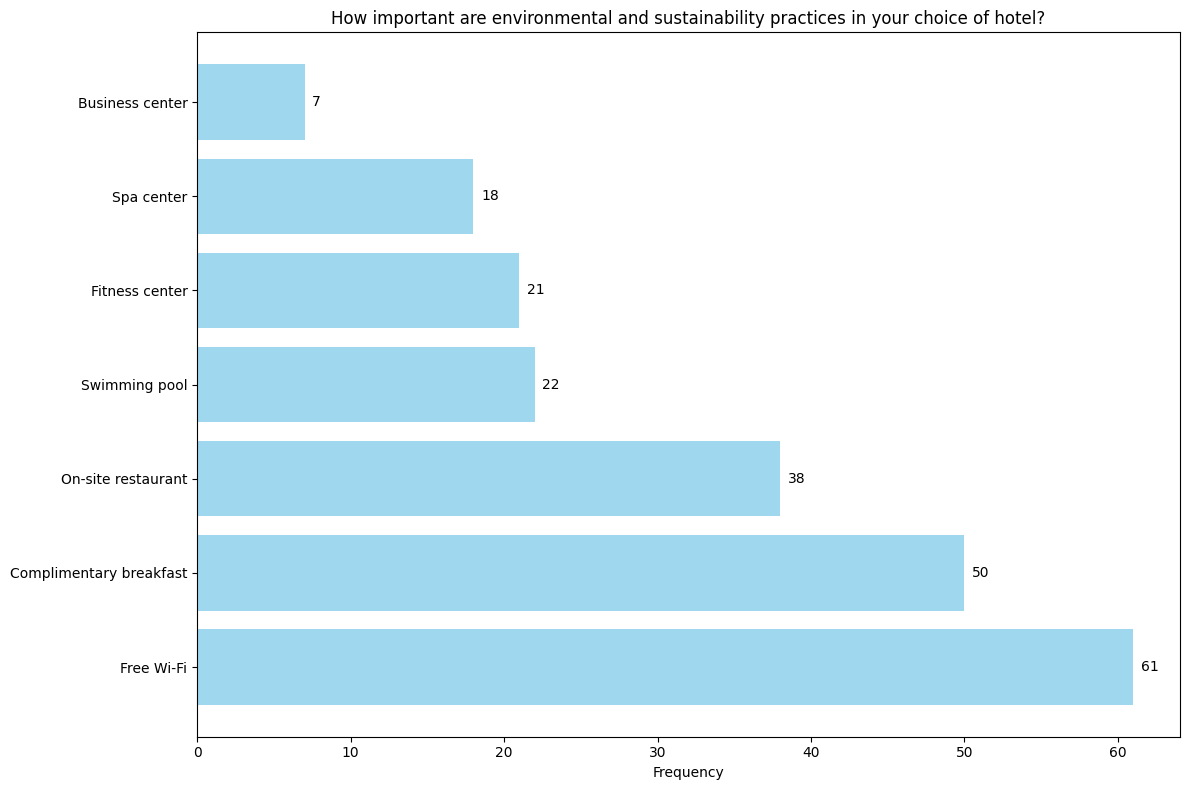

In [144]:
# Data from the table
Ameneties2 = ['Free Wi-Fi', 'Complimentary breakfast', 'Swimming pool', 'Fitness center', 'Spa center', 'On-site restaurant', 'Business center']
frequencies = [61, 50, 22, 21, 18, 38, 7]

# Sort the data in descending order
Ameneties2, frequencies = zip(*sorted(zip(Ameneties2, frequencies), key=lambda x: x[1], reverse=True))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar chart
ax.barh(Ameneties2, frequencies, color='skyblue', alpha=0.8)

# Customize the chart
ax.set_xlabel('Frequency')
ax.set_title('How important are environmental and sustainability practices in your choice of hotel?')

# Add value labels on the bars
for i, v in enumerate(frequencies):
    ax.text(v + 0.5, i, str(v), va='center')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

In [62]:
print(pd.concat([df["Practices"].value_counts(), df["Practices"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                    Count  Percentage
Practices                            
Very important         52    0.722222
Neutral                16    0.222222
Somewhat important      4    0.055556


In [63]:
# Convert Practices to numeric using mapping
Practices_map = {'Very important': 1, 'Somewhat important': 2, "Neutral": 3, "Not very important": 4, "Not important at all": 5}
df['Practices'] = df['Practices'].map(Practices_map)

# Descriptive statistics
print(df['Practices'].describe())

count    72.000000
mean      1.500000
std       0.839181
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Practices, dtype: float64


In [147]:
print(pd.concat([df["Hear"].value_counts(), df["Hear"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

                                 Count  Percentage
Hear                                              
Online search                       29    0.402778
Social media                        13    0.180556
Friend or family recommendation     10    0.138889
Never                                9    0.125000
Advertisement                        5    0.069444
Travel agency                        2    0.027778
Not too far from where I live        1    0.013889
On the road                          1    0.013889
University of derby                  1    0.013889
Physical                             1    0.013889


In [148]:
# Convert Hear to numeric using mapping
Hear_map = {'Online search': 1, 'Social media': 2, "Friend or family recommendation": 3, "Travel agency": 4, "Advertisement (TV, radio, print)": 5, "Other": 6}
df['Hear'] = df['Hear'].map(Hear_map)

# Descriptive statistics
print(df['Hear'].describe())

count    54.000000
mean      1.722222
std       0.898986
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: Hear, dtype: float64


In [68]:
print(pd.concat([df["Recommend"].value_counts(), df["Recommend"].value_counts(normalize=True)], axis=1, keys=['Count', 'Percentage']))

               Count  Percentage
Recommend                       
Neutral           18    0.250000
Unlikely          16    0.222222
Likely            16    0.222222
Very likely       13    0.180556
Very unlikely      9    0.125000


In [69]:
# Convert Recommend to numeric using mapping
Recommend_map = {'Very likely': 1, 'Likely': 2, "Neutral": 3, "Unlikely": 4, "Very unlikely": 5}
df['Recommend'] = df['Recommend'].map(Recommend_map)

# Descriptive statistics
print(df['Recommend'].describe())

count    72.000000
mean      2.888889
std       1.295230
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Recommend, dtype: float64


In [71]:
pybool4 = df['Receive'].str.contains('SMS')
pybool4.value_counts()
pybool4.value_counts(normalize=True)

Receive
False    0.722222
True     0.277778
Name: proportion, dtype: float64

In [72]:
pybool4 = df['Receive'].str.split(',', expand=True)
pybool4.head()

,0,1,2,3,4
0,Email,None,None,None,None
1,Email,SMS,None,None,None
2,SMS,None,None,None,None
3,SMS,None,None,None,None
4,Email,None,None,None,None


In [73]:
pybool4.stack().value_counts()

Email                       50
 SMS                        12
Social media                11
SMS                          8
 Social media                6
 Hotel app notifications     6
 Direct mail                 4
Direct mail                  3
Name: count, dtype: int64

In [74]:
pybool4.stack().value_counts(normalize=True)

Email                       0.50
 SMS                        0.12
Social media                0.11
SMS                         0.08
 Social media               0.06
 Hotel app notifications    0.06
 Direct mail                0.04
Direct mail                 0.03
Name: proportion, dtype: float64

<Axes: title={'center': 'How do you prefer to receive updates and promotions from hotels?'}, ylabel='Frequency'>

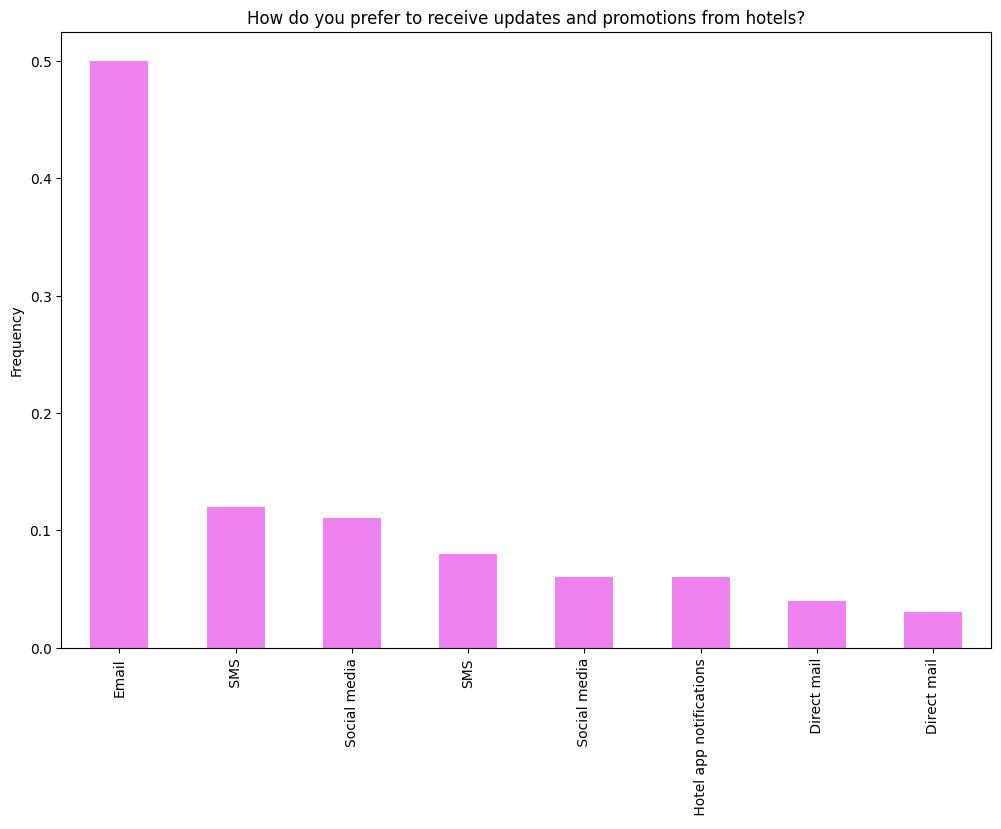

In [150]:
pybool4.stack().value_counts(normalize=True).plot(kind='bar', figsize= (12, 8), color ='violet', title = 'How do you prefer to receive updates and promotions from hotels?', ylabel = 'Frequency')

In [79]:
pybool4.stack().value_counts().describe()

count     8.00000
mean     12.50000
std      15.47348
min       3.00000
25%       5.50000
50%       7.00000
75%      11.25000
max      50.00000
Name: count, dtype: float64

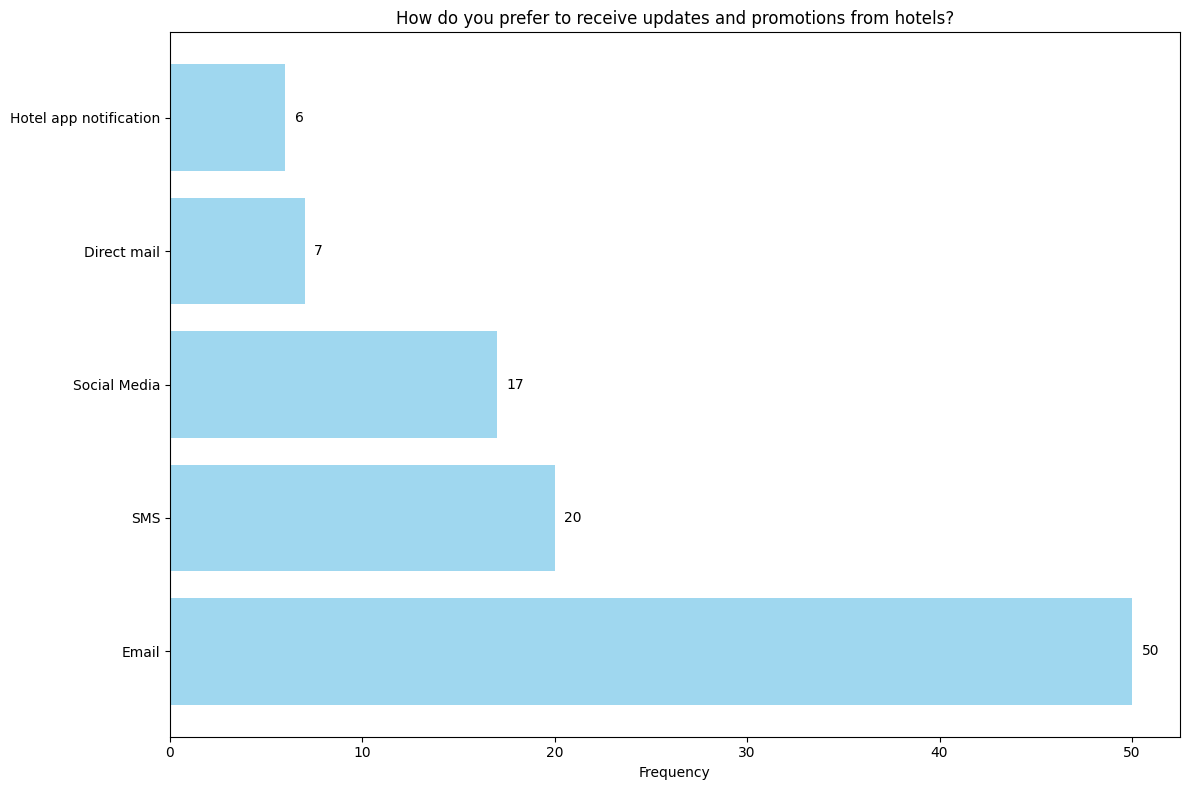

In [154]:
# Data from the table
Receive2 = ['Email', 'SMS', 'Social Media', 'Hotel app notification', 'Direct mail']
frequencies = [50, 20, 17, 6, 7]

# Sort the data in descending order
Receive2, frequencies = zip(*sorted(zip(Receive2, frequencies), key=lambda x: x[1], reverse=True))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar chart
ax.barh(Receive2, frequencies, color='skyblue', alpha=0.8)

# Customize the chart
ax.set_xlabel('Frequency')
ax.set_title('How do you prefer to receive updates and promotions from hotels?')

# Add value labels on the bars
for i, v in enumerate(frequencies):
    ax.text(v + 0.5, i, str(v), va='center')

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

In [155]:
from sklearn.preprocessing import LabelEncoder

In [160]:
# Import the datset into python
df2 = pd.read_excel(r"C:\Users\ia\Desktop\Travail\Bello Shakiru\3\Developing a Targeted Marketing Strategy for Continental Hotel hypothesis.xlsx")


In [162]:
# View the first five 
df2.head()


,Gender,Income,Location,Stay
0,Female,"£25,000 - £49,999",United Kingdom,2-3 times
1,Female,"Less than £25,000",United Kingdom,2-3 times
2,Male,"Less than £25,000",United Kingdom,4-6 times
3,Female,"Less than £25,000",United Kingdom,2-3 times
4,Male,"£25,000 - £49,999",United Kingdom,4-6 times


In [163]:
from io import StringIO

In [165]:
# Define the mapping dictionaries  
Age_map = {'18-24 years': 1, '25-34 years': 2, "35-44 years": 3, "45-54 years": 4, "55-64 years": 5}  
Gender_map = {'Male': 0, 'Female': 1}  
Income_map = {'Less than £25,000': 1, '£25,000-£49,999': 2, '£50,000-£74,999': 3, "£100,000-£149,999": 4, "£75,000-£99,999": 5}  
Location_map = {'United Kingdom': 1, 'Nigeria': 2, "Iran": 3}  
Stay_map = {'Once': 1, '2-3 times': 2, '4-6 times': 3, 'More than 6 times': 4}  

In [177]:
# Assuming you have a pandas DataFrame df loaded from the image  
# For demonstration purposes, we will create a sample DataFrame  
np.random.seed(0)  
df = pd.DataFrame({  
    'Age': np.random.choice(['18-24 years', '25-34 years', "35-44 years", "45-54 years", "55-64 years"], size=72),  
    'Gender': np.random.choice(['Male', 'Female'], size=72),  
    'Income': np.random.choice(['Less than £25,000', '£25,000-£49,999', "£50,000-£74,999", "£100,000-£149,999", "£75,000-£99,999"], size=72),  
    'Location': np.random.choice(['United Kingdom', 'Nigeria', "Iran"], size=72),  
    'Stay': np.random.choice(['Once', '2-3 times', "4-6 times", "More than 6 times"], size=72)  
})  

In [178]:
# Map the string values to numerical values  
df['Age'] = df['Age'].map(Age_map)  
df['Gender'] = df['Gender'].map(Gender_map)  
df['Income'] = df['Income'].map(Income_map)  
df['Location'] = df['Location'].map(Location_map)  
df['Stay'] = df['Stay'].map(Stay_map)  

In [179]:
# Calculate the correlation matrix  
corr_matrix = df.corr()  


In [180]:
# View the correlation 
print(corr_matrix)

               Age    Gender    Income  Location      Stay
Age       1.000000  0.106207 -0.014416  0.051491 -0.011837
Gender    0.106207  1.000000 -0.036867  0.186469 -0.128438
Income   -0.014416 -0.036867  1.000000 -0.191798 -0.056175
Location  0.051491  0.186469 -0.191798  1.000000 -0.171131
Stay     -0.011837 -0.128438 -0.056175 -0.171131  1.000000
